# Gold Recovery Prediction from Ore

Gold Recovery Prediction Model for Industrial Efficiency

As a part of our company's solutions to improve the efficiency of industrial enterprises, we aim to develop a machine learning model that can accurately predict the recovery factor of gold from gold ore. This model will serve as an important tool in optimizing production processes and minimizing losses.

The project will involve the following steps:

- Data Collection: Gathering relevant data on gold ore processing operations, including information on input variables, operational parameters, and gold recovery rates.
- Data Preprocessing: Preprocessing the collected data by handling missing values, dealing with outliers, and performing feature engineering to prepare the data for model building.
- Feature Selection: Selecting the most important features that have a significant impact on gold recovery, using techniques such as feature importance analysis or correlation analysis.
- Model Building: Building and training machine learning models, such as regression, decision trees, or ensemble methods, using the preprocessed data. The models will be optimized to achieve high prediction accuracy.
- Model Evaluation: Evaluating the performance of the models using appropriate metrics, such as mean squared error (MSE) or R-squared, and selecting the model with the best performance.
- Model Interpretation: Interpreting the results of the chosen model to understand the factors that influence gold recovery and providing recommendations for optimizing production processes based on the model's insights.

Libraries: Pandas, NumPy, Matplotlib, Scikit-learn for data preprocessing, model building, and evaluation.

## Data preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import RandomState
from random import sample
import re
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.datasets import make_regression

In [2]:
df = pd.read_csv("gold_recovery_full_new.csv")

In [3]:
df_train = pd.read_csv("gold_recovery_train_new.csv")

In [4]:
df_test = pd.read_csv("gold_recovery_test_new.csv")

In [5]:
df.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [7]:
df_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [9]:
df_test.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Let's check that the enrichment efficiency is calculated correctly. Let's calculate it on the training sample for the feature rougher.output.recovery. Let's find MAE between calculations and feature value.

In [11]:
df_train["rougher.output.recovery"]

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

Let's create a formula for calculating the enrichment efficiency and calculate it again.

In [12]:
def rougher_output_recovery(
    rougher_output_concentrate_au, rougher_input_feed_au, rougher_output_tail_au
):
    return (
        (
            rougher_output_concentrate_au
            * (rougher_input_feed_au - rougher_output_tail_au)
        )
        / (
            rougher_input_feed_au
            * (rougher_output_concentrate_au - rougher_output_tail_au)
        )
        * 100
    )

In [13]:
ror_train_recalc = rougher_output_recovery(
    df_train["rougher.output.concentrate_au"],
    df_train["rougher.input.feed_au"],
    df_train["rougher.output.tail_au"],
)

In [14]:
print(
    "MAE=", mean_absolute_error(df_train["rougher.output.recovery"], ror_train_recalc)
)

MAE= 9.73512347450521e-15


The value of **MAE** is practically zero, which means that the initial values are calculated correctly.

Let's analyze the features that are not available in the test sample. What are these parameters? What type are they?

In [15]:
res = [x for x in list(df_train.columns) + list(df_test.columns) if x not in list(df_train.columns) or x not in list(df_test.columns)] 
print('The number of features missing in the test sample:', len(res))
print(res)
if not res: 
    print("df_train.columns and df_test.columns lists are equal") 
else: 
    print("df_train.columns and df_test.columns lists are different")


The number of features missing in the test sample: 34
['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.ta

**input** — raw material parameters, **state** — parameters characterizing the current stage state.

Accordingly, there are no signs describing **output**(*product parameters*) and **calculation**(*calculated characteristics*) in this sample, only starting indicators and indicators of the processes themselves.

Let's start preprocessing the data.

In [16]:
def convert_to_dt(df, column_name):
    return pd.to_datetime(df[column_name])

We create a function to simplify the conversion.

In [17]:
df["date"] = convert_to_dt(df, "date")

In [18]:
df_train["date"] = convert_to_dt(df_train, "date")

In [19]:
df_test["date"] = convert_to_dt(df_test, "date")

In [20]:
df.duplicated().mean()

0.0

In [21]:
df_train.duplicated().mean()

0.0

In [22]:
df_test.duplicated().mean()

0.0

In [23]:
df.isna().sum().max()

1748

In [24]:
df_train.isna().sum().max()

1605

In [25]:
df_test.isna().sum().max()

25

In all datasets, there are gaps, in order to eliminate NaN and not lose valuable information, we will use the direct filling method. Let us preliminarily estimate the shares of these omissions.

In [26]:
print(
    "Percentage of Potentially Deleted Rows:",
    ((df.isna().sum().max() / df.count()) * 100).mean(),
    "%",
)

Percentage of Potentially Deleted Rows: 9.017174635731799 %


In [27]:
print(
    "Percentage of Potentially Deleted Rows:",
    ((df_train.isna().sum().max() / df.count()) * 100).mean(),
    "%",
)

Percentage of Potentially Deleted Rows: 8.27949959402147 %


In [28]:
print(
    "Percentage of Potentially Deleted Rows:",
    ((df_test.isna().sum().max() / df.count()) * 100).mean(),
    "%",
)

Percentage of Potentially Deleted Rows: 0.1289641681311756 %


The share is decent, the removal may affect the subsequent result. We use the direct filling method.

In [29]:
df = df.ffill()
df_train = df_train.ffill()
df_test = df_test.ffill()

In [30]:
df.isna().sum().max()
df_train.isna().sum().max()
df_test.isna().sum().max()

0

Passes processed.

Let's make the date columns an index of datasets to facilitate interaction between them.

In [31]:
df = df.set_index("date")
df_train = df_train.set_index("date")
df_test = df_test.set_index("date")

Let's load the missing features from the full dataset into the test one.

In [32]:
df_test_for_slpit = df_test.merge(
    df[
        [
            "final.output.concentrate_ag",
            "final.output.concentrate_pb",
            "final.output.concentrate_sol",
            "final.output.concentrate_au",
            "final.output.recovery",
            "final.output.tail_ag",
            "final.output.tail_pb",
            "final.output.tail_sol",
            "final.output.tail_au",
            "primary_cleaner.output.concentrate_ag",
            "primary_cleaner.output.concentrate_pb",
            "primary_cleaner.output.concentrate_sol",
            "primary_cleaner.output.concentrate_au",
            "primary_cleaner.output.tail_ag",
            "primary_cleaner.output.tail_pb",
            "primary_cleaner.output.tail_sol",
            "primary_cleaner.output.tail_au",
            "rougher.calculation.sulfate_to_au_concentrate",
            "rougher.calculation.floatbank10_sulfate_to_au_feed",
            "rougher.calculation.floatbank11_sulfate_to_au_feed",
            "rougher.calculation.au_pb_ratio",
            "rougher.output.concentrate_ag",
            "rougher.output.concentrate_pb",
            "rougher.output.concentrate_sol",
            "rougher.output.concentrate_au",
            "rougher.output.recovery",
            "rougher.output.tail_ag",
            "rougher.output.tail_pb",
            "rougher.output.tail_sol",
            "rougher.output.tail_au",
            "secondary_cleaner.output.tail_ag",
            "secondary_cleaner.output.tail_pb",
            "secondary_cleaner.output.tail_sol",
            "secondary_cleaner.output.tail_au",
        ]
    ],
    left_index=True,
    right_index=True,
)

Let's additionally align the column indexes.

In [33]:
df_test_for_slpit = df_test_for_slpit.reindex(columns=list(df_train.columns))

The data has been processed and is ready for analysis.

## Data analysis

See how the concentration of metals (Au, Ag, Pb) changes at different stages of purification. Describe the findings.

In [34]:
df_train["primary_cleaner.output.concentrate_pb"].mean()

9.568544006770484

In [35]:
table = [
    [
        df_train["rougher.output.concentrate_ag"].mean(),
        df_train["primary_cleaner.output.concentrate_ag"].mean(),
        df_train["final.output.concentrate_ag"].mean(),
    ],
    [
        df_train["rougher.output.concentrate_au"].mean(),
        df_train["primary_cleaner.output.concentrate_au"].mean(),
        df_train["final.output.concentrate_au"].mean(),
    ],
    [
        df_train["rougher.output.concentrate_pb"].mean(),
        df_train["primary_cleaner.output.concentrate_pb"].mean(),
        df_train["final.output.concentrate_pb"].mean(),
    ],
]

columns = ["flotation", "primary cleaning", "final features"]
index = ["Ag", "Au", "Pb"]
table_1 = pd.DataFrame(table, index, columns)
display(table_1)

,flotation,primary cleaning,final features
Ag,11.775812,8.200916,5.141921
Au,19.439958,32.386836,44.003792
Pb,7.664555,9.568544,10.132848


/tmp/ipykernel_14414/684245112.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["rougher.output.concentrate_ag"], label="flotation", ax=ax)
/tmp/ipykernel_14414/684245112.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_14414/684245112.py:7: UserWarning: 

`distplo

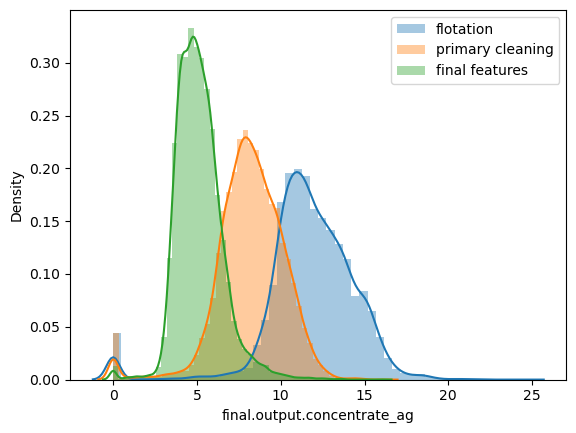

In [36]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.output.concentrate_ag"], label="flotation", ax=ax)
sns.distplot(
    df_train["primary_cleaner.output.concentrate_ag"], label="primary cleaning", ax=ax
)
sns.distplot(df_train["final.output.concentrate_ag"], label="final features", ax=ax)

ax.legend()

/tmp/ipykernel_14414/3553637576.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["rougher.output.concentrate_au"], label="flotation", ax=ax)
/tmp/ipykernel_14414/3553637576.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_14414/3553637576.py:7: UserWarning: 

`dist

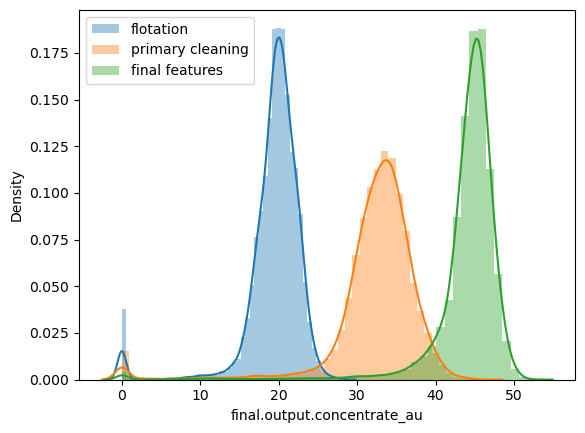

In [37]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.output.concentrate_au"], label="flotation", ax=ax)
sns.distplot(
    df_train["primary_cleaner.output.concentrate_au"], label="primary cleaning", ax=ax
)
sns.distplot(df_train["final.output.concentrate_au"], label="final features", ax=ax)

ax.legend()

/tmp/ipykernel_14414/1543383914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["rougher.output.concentrate_pb"], label="flotaion", ax=ax)
/tmp/ipykernel_14414/1543383914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_14414/1543383914.py:7: UserWarning: 

`distp

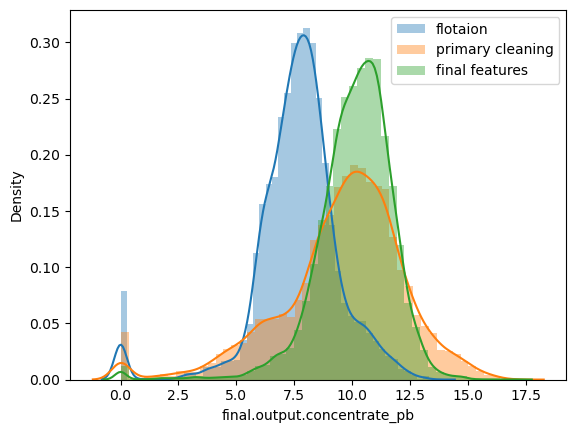

In [38]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.output.concentrate_pb"], label="flotaion", ax=ax)
sns.distplot(
    df_train["primary_cleaner.output.concentrate_pb"], label="primary cleaning", ax=ax
)
sns.distplot(df_train["final.output.concentrate_pb"], label="final features", ax=ax)

ax.legend()

The analysis showed a significant decrease in the concentration of silver, a slight decrease in the concentration of lead and a significant increase in the concentration of gold.

Let us compare the size distributions of raw material granules on the training and test samples. If the distributions are very different from each other, the estimation of the model will be wrong.

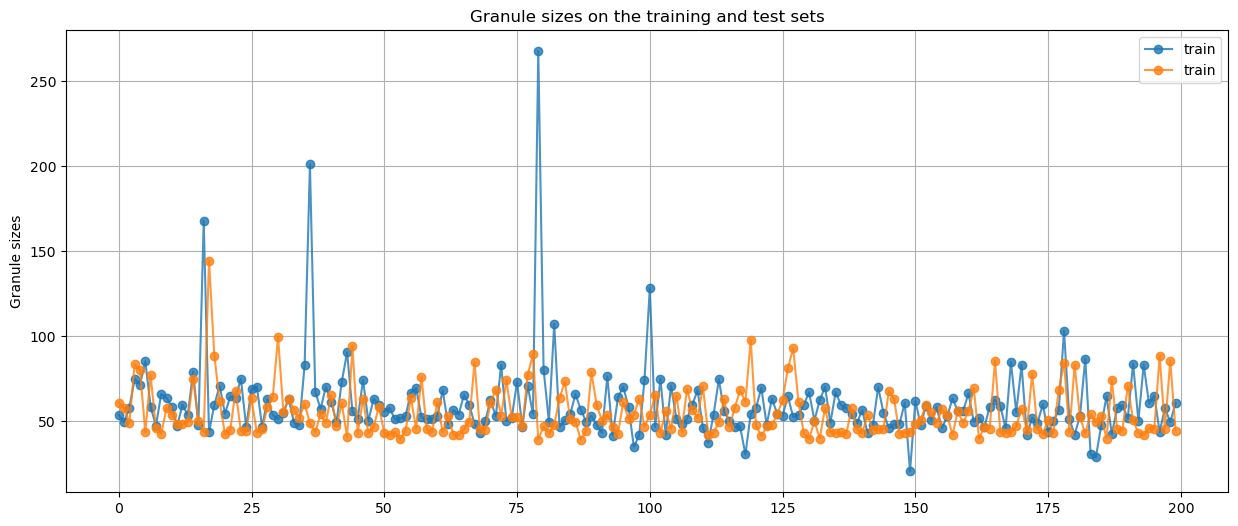

In [39]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.title("Granule sizes on the training and test sets")

tmp = (
    df_train["rougher.input.feed_size"]
    .sample(200, random_state=1)
    .reset_index(drop=True)
)
tmp.plot(x="", style="o-", label="train", alpha=0.8, grid=True)

tmp2 = (
    df_test["rougher.input.feed_size"]
    .sample(200, random_state=1)
    .reset_index(drop=True)
)
tmp2.plot(x="", style="o-", label="train", alpha=0.8, grid=True)

plt.ylabel("Granule sizes")
plt.legend()
plt.show()

The size distributions of raw material granules on the training and test sets do not have strong differences, with the exception of a number of outliers in the training set. Emissions - a conventional name, in fact, these are real data, which in some cases go beyond.

We investigate the total concentration of all substances at different stages: in raw materials, in roughing and final concentrates.

In [40]:
table = [
    [
        df_train["rougher.input.feed_ag"].sum(),
        df_train["rougher.output.concentrate_ag"].sum(),
        df_train["final.output.concentrate_ag"].sum(),
    ],
    [
        df_train["rougher.input.feed_au"].sum(),
        df_train["rougher.output.concentrate_au"].sum(),
        df_train["final.output.concentrate_au"].sum(),
    ],
    [
        df_train["rougher.input.feed_pb"].sum(),
        df_train["rougher.output.concentrate_pb"].sum(),
        df_train["final.output.concentrate_pb"].sum(),
    ],
    [
        df_train["rougher.input.feed_sol"].sum(),
        df_train["rougher.output.concentrate_sol"].sum(),
        df_train["final.output.concentrate_sol"].sum(),
    ],
]

df_train["rougher.output.concentrate_sol"]

columns = ["raw material", "crude concentrate", "final concentrate"]
index = ["Ag", "Au", "Pb", "Sol"]
table_1 = pd.DataFrame(table, index, columns)
display(table_1)

,raw material,crude concentrate,final concentrate
Ag,121387.032837,166615.968436,72753.039166
Au,111304.195736,275055.963640,622609.647646
Pb,49598.819723,108445.785179,143369.662930
Sol,513480.408925,400315.116968,128887.647605


/tmp/ipykernel_14414/78199914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["rougher.input.feed_ag"], label="raw material", ax=ax)
/tmp/ipykernel_14414/78199914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_14414/78199914.py:7: UserWarning: 

`distplot` is a 

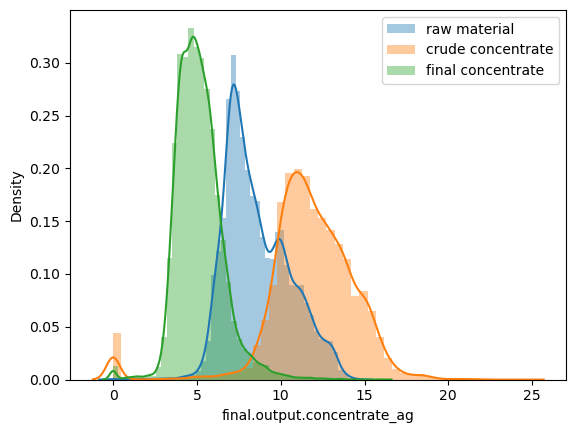

In [41]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.input.feed_ag"], label="raw material", ax=ax)
sns.distplot(
    df_train["rougher.output.concentrate_ag"], label="crude concentrate", ax=ax
)
sns.distplot(
    df_train["final.output.concentrate_ag"], label="final concentrate", ax=ax
)

ax.legend()

/tmp/ipykernel_14414/1097003428.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["rougher.input.feed_au"], label="raw material", ax=ax)
/tmp/ipykernel_14414/1097003428.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_14414/1097003428.py:7: UserWarning: 

`distplot`

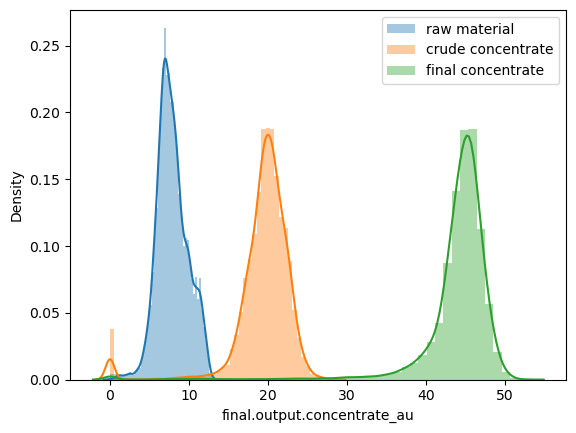

In [42]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.input.feed_au"], label="raw material", ax=ax)
sns.distplot(
    df_train["rougher.output.concentrate_au"], label="crude concentrate", ax=ax
)
sns.distplot(
    df_train["final.output.concentrate_au"], label="final concentrate", ax=ax
)

ax.legend()

/tmp/ipykernel_14414/1992513175.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["rougher.input.feed_pb"], label="raw material", ax=ax)
/tmp/ipykernel_14414/1992513175.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_14414/1992513175.py:7: UserWarning: 

`distplot`

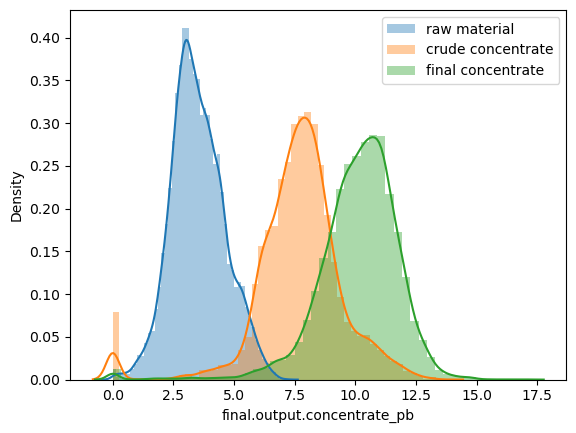

In [43]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.input.feed_pb"], label="raw material", ax=ax)
sns.distplot(
    df_train["rougher.output.concentrate_pb"], label="crude concentrate", ax=ax
)
sns.distplot(
    df_train["final.output.concentrate_pb"], label="final concentrate", ax=ax
)

ax.legend()

/tmp/ipykernel_14414/1118215432.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["rougher.input.feed_sol"], label="raw material", ax=ax)
/tmp/ipykernel_14414/1118215432.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_14414/1118215432.py:7: UserWarning: 

`distplot

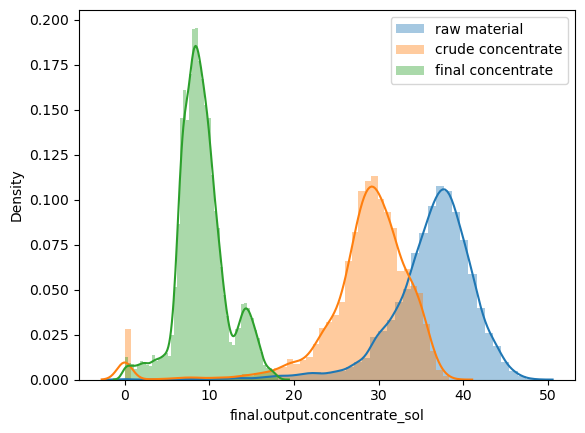

In [44]:
f, ax = plt.subplots()

sns.distplot(df_train["rougher.input.feed_sol"], label="raw material", ax=ax)
sns.distplot(
    df_train["rougher.output.concentrate_sol"], label="crude concentrate", ax=ax
)
sns.distplot(
    df_train["final.output.concentrate_sol"], label="final concentrate", ax=ax
)

ax.legend()

In the case of all substances, there are outliers - zero values, in some cases - negative, they must be eliminated in order for the model to make qualitative predictions.

In [45]:
df_train = df_train[df_train["primary_cleaner.output.concentrate_au"] > 0]
df_train = df_train[df_train["rougher.input.feed_au"] > 0]
df_train = df_train[df_train["rougher.output.concentrate_au"] > 0]
df_train = df_train[df_train["final.output.concentrate_au"] > 0]

In [46]:
df_train = df_train[df_train["primary_cleaner.output.concentrate_ag"] > 0]
df_train = df_train[df_train["rougher.input.feed_ag"] > 0]
df_train = df_train[df_train["rougher.output.concentrate_ag"] > 0]
df_train = df_train[df_train["final.output.concentrate_ag"] > 0]

In [47]:
df_train = df_train[df_train["primary_cleaner.output.concentrate_pb"] > 0]
df_train = df_train[df_train["rougher.input.feed_pb"] > 0]
df_train = df_train[df_train["rougher.output.concentrate_pb"] > 0]
df_train = df_train[df_train["final.output.concentrate_pb"] > 0]

In [48]:
df_train = df_train[df_train["primary_cleaner.output.concentrate_sol"] > 0]
df_train = df_train[df_train["rougher.input.feed_sol"] > 0]
df_train = df_train[df_train["rougher.output.concentrate_sol"] > 0]
df_train = df_train[df_train["final.output.concentrate_sol"] > 0]

Outliers removed.

## Model

Let's write a function to calculate the final sMAPE.

In [49]:
def sMAPE_score(rougher_real, rougher_predicted):
    return (
        np.mean(
            abs(rougher_real - rougher_predicted)
            / ((abs(rougher_real) + abs(rougher_predicted)) / 2)
        )
        * 100
    )

In [50]:
def sMAPE_total_score(
    rougher_real,
    rougher_predicted,
    final_real,
    final_predicted,
):
    rougher_sMAPE = sMAPE_score(rougher_real, rougher_predicted)
    final_sMAPE = sMAPE_score(final_real, final_predicted)

    return rougher_sMAPE * 0.25 + final_sMAPE * 0.75

We will train different models and evaluate their quality by cross-validation. Let's choose the best model and check it on the test set.

In [51]:
df_train_ml = df_train.reindex(columns=list(df_test.columns))

In [52]:
features_train = df_train_ml

target_train_rougher = df_train["rougher.output.recovery"]
target_train_final = df_train["final.output.recovery"]

Let's create a suitable test sample for subsequent use in the model (with the correct number of features, their order, etc.)

In [53]:
features_test = df_test
target_test_rougher = df_test_for_slpit["rougher.output.recovery"]
target_test_final = df_test_for_slpit["final.output.recovery"]

In [54]:
features_test.head(2)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


In [55]:
features_train.head(2)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [56]:
state = RandomState(12345)

In [57]:
smape = make_scorer(sMAPE_score, greater_is_better=False)

In [58]:
params_dtr_grid = {"max_depth": range(1, 6)}

model_dtr_rougher = DecisionTreeRegressor(random_state=state)

grid_dtr_rougher = GridSearchCV(
    model_dtr_rougher, param_grid=params_dtr_grid, cv=5, scoring=smape, refit=True
)
grid_dtr_rougher.fit(features_train, target_train_rougher)
params_dtr_grid_rougher = grid_dtr_rougher.best_params_
grid_dtr_best_rougher = DecisionTreeRegressor(
    **params_dtr_grid_rougher, random_state=state
)
grid_dtr_best_rougher.fit(features_train, target_train_rougher)

print("DecisionTreeRegressor best parameters:", params_dtr_grid_rougher)

DecisionTreeRegressor best parameters: {'max_depth': 4}


In [59]:
params_rfr_grid = {"max_depth": range(1, 20, 3)}

model_rfr_rougher = RandomForestRegressor(random_state=state)

grid_rfr_rougher = GridSearchCV(
    model_rfr_rougher, params_rfr_grid, cv=3, n_jobs=-1, verbose=2, scoring=smape
)
grid_rfr_rougher.fit(features_train, target_train_rougher)
params_rfr_grid_rougher = grid_rfr_rougher.best_params_
grid_rfr_best_rougher = RandomForestRegressor(
    **params_rfr_grid_rougher, random_state=state
)
grid_rfr_best_rougher.fit(features_train, target_train_rougher)

print("RandomForestRegressor  best parameters:", params_rfr_grid_rougher)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
RandomForestRegressor  best parameters: {'max_depth': 16}


In [60]:
model_lr_rougher = LinearRegression()
parameters = {
    "fit_intercept": [True, False]
}
grid_lr_rougher = GridSearchCV(
    model_lr_rougher, param_grid=parameters, cv=5, scoring=smape, refit=True
)
grid_lr_rougher.fit(features_train, target_train_rougher)
params_lr_grid_rougher = grid_lr_rougher.best_params_
grid_lr_best_rougher = LinearRegression(**params_lr_grid_rougher)
grid_lr_best_rougher.fit(features_train, target_train_rougher)

print("LinearRegression best parameters:", params_lr_grid_rougher)
grid_lr_rougher.best_score_

LinearRegression best parameters: {'fit_intercept': True}


-7.270025499957096

In [61]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train_rougher)

DummyClassifier(strategy='most_frequent')

In [62]:
rougher_predicted_dtr = grid_dtr_best_rougher.predict(features_test)
final_predicted_dtr = grid_dtr_best_rougher.predict(features_test)
rougher_predicted_rfr = grid_rfr_best_rougher.predict(features_test)
final_predicted_rfr = grid_rfr_best_rougher.predict(features_test)
rougher_predicted_lr = grid_lr_best_rougher.predict(features_test)
final_predicted_lr = grid_lr_best_rougher.predict(features_test)
predicted_dummy = dummy_clf.predict(features_test)

In [63]:
table = [
    [
        sMAPE_total_score(
            target_test_rougher,
            rougher_predicted_dtr,
            target_test_final,
            final_predicted_dtr,
        ),
        sMAPE_total_score(
            target_test_rougher,
            rougher_predicted_rfr,
            target_test_final,
            final_predicted_rfr,
        ),
        sMAPE_total_score(
            target_test_rougher,
            rougher_predicted_lr,
            target_test_final,
            final_predicted_lr,
        ),
        sMAPE_total_score(
            target_test_rougher,
            predicted_dummy,
            target_test_final,
            predicted_dummy,
        ),
    ]
]
columns = ["dtr", "rfr", "lr", "dummy"]
index = ["total_SMAPE"]
table_2 = pd.DataFrame(table, index, columns)
display(table_2)

,dtr,rfr,lr,dummy
total_SMAPE,19.86271,19.980664,19.51421,33.325326


In [64]:
print("The most suitable model:", grid_lr_best_rougher)

The most suitable model: LinearRegression()


The above model is optimal for the task, as can be seen from the experiment.

Summary of work done:

    1) Pre-processing meant (meaning, in addition to searching for anomalies, duplicates, etc.), including the refinement of the proposed test set, the addition of features from the main dataset, the alignment of the order of features (columns) for the correct selection of the model in the future;
    
    2) Analysis of the content of the elements indicated in these data at different stages of processing showed:
        - a significant decrease in the concentration of silver;
        - a slight decrease in the concentration of lead;
        - a significant increase in the concentration of gold;
        
    3) Similar results were obtained in the study of the total concentration of all substances at different stages: in raw materials, in rough and final concentrates;
    
    4) Models were selected using the sMAPE metric, as a result of which, using the test, the most effective model was determined - RandomForestRegressor with best parameters: {'max_depth': 16}. The metrics scores were compared with the constant model.